Apply FINCHES on co-expressed ADs and CoAs.

Get ADs for co-expressed TFs on MED12/12L.

In [63]:
import pandas as pd
import numpy as np

---
# Getting list of MED12/12L TFs to run on FINCHES

In [64]:
#Get list of ADs, with uniprot ID, Gene name, ensemble, AD sequence
ADs = pd.read_csv("~/Desktop/StallerRotation/TF_list/original_data/known_ADs_considering_isoforms_and_canonical.csv") 
ADs_mapped = pd.read_csv("~/Desktop/StallerRotation/cofactors_humanproteinatlas/data/TF-AD-RD/ADs_mapped.tsv", sep="\t")
ADs_mapped["Bgee"] = ADs_mapped["Bgee"].apply(lambda x: x.replace(";", "") if isinstance(x, str) else x)

ADs_selected = ADs[["uniprotID", "Gene", "Start", "End", "ProteinRegionSeq"]]
ADs_selected = ADs_selected.merge(ADs_mapped.set_index("Entry")[["Bgee"]], left_on="uniprotID", right_index=True, how="left")
ADs_selected = ADs_selected.rename({"ProteinRegionSeq": "Sequence", "Bgee": "Ensembl"}, axis=1)
ADs_selected.head()

,uniprotID,Gene,Start,End,Sequence,Ensembl
0,Q6UWZ7,ABRAXAS1,121,200,LQEHFSNQDLVFLLLTPSIITESCSTHRLEHSLYKPQKGLFHRVPL...,ENSG00000163322
1,Q8IUX7,AEBP1,1088,1158,EVVTEFGTEVEPEFGTKVEPEFETQLEPEFETQLEPEFEEEEEEEK...,ENSG00000106624
2,Q8WYP5,AHCTF1,1445,1698,IRANDNKSMADVLGDGGNSSLTISEGPIVSERRLNQEVALNLKEDH...,ENSG00000153207
3,P35869,AHR,118,126,LLQALNGFV,ENSG00000106546
4,P35869,AHR,266,268,FAI,ENSG00000106546


In [ ]:
#Get list of MED12/12L TFs, find ADs

MED12_12L_TFs = pd.read_csv("../cofactors_humanproteinatlas/helperdata/MED12_L_distances.csv")

MED12_12L_TF_ADs = ADs_selected.merge(MED12_12L_TFs.set_index("Ensembl")[["Distance from MED12L", "Distance from MED12"]], left_on="Ensembl", right_index=True, how="inner")
MED12_12L_TF_ADs = MED12_12L_TF_ADs.reset_index(drop=True)

aa_length_cutoff = 20
MED12_12L_TF_ADs = MED12_12L_TF_ADs[[len(x) >= aa_length_cutoff for x in MED12_12L_TF_ADs["Sequence"]]]

MED12_12L_TF_ADs.to_csv("helperdata/MED12_12L_ADs.csv")

---
# Analyzing FINCHES results

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [183]:
finches_results = pd.read_csv("helperdata/MED12_12L_ADs_finches.csv").drop("Unnamed: 0", axis =1)
finches_pivot = finches_results.pivot(index="Prot1", columns="Prot2", values="Total e (mf)")
finches_pivot_merge = finches_pivot.join(MED12_12L_TF_ADs[["Gene", "Distance from MED12L", "Distance from MED12"]].reset_index()).drop("index", axis=1)
finches_pivot_merge.head()

,MED12L_1.0,MED12L_2.0,MED12L_3.0,MED12L_4.0,MED12L_5.0,MED12L_6.0,MED12L_7.0,MED12L_Whole Sequence,MED12_1.0,MED12_2.0,MED12_3.0,MED12_4.0,MED12_5.0,MED12_6.0,MED12_7.0,MED12_Whole Sequence,Gene,Distance from MED12L,Distance from MED12
Prot1,,,,,,,,,,,,,,,,,,,
0.0,0.048112,0.409835,16.599494,1.756100,-1.693876,-1.270522,-2.627185,0.511863,-1.371490,2.466926,8.882567,10.302418,3.205037,-0.748105,-3.330992,0.835074,AEBP1,836.188609,642.372711
1.0,5.156348,10.285469,40.647726,11.519500,9.315119,6.543299,1.111493,7.011656,4.744340,15.709648,26.890116,27.583613,11.169035,9.199839,-0.128405,7.570830,AHCTF1,490.640428,201.994257
2.0,-6.553059,0.646045,24.981132,2.501043,6.697873,0.737408,-9.388513,-2.970319,-3.710217,5.714380,15.926173,11.907293,-0.505336,4.831533,-11.265546,-2.908594,AHR,745.729187,508.062644
3.0,1.108467,6.958557,22.259525,8.139757,11.613031,6.789823,-0.651434,3.584888,3.627922,10.850067,16.908439,14.277950,4.900904,10.090776,-1.854966,3.629012,AIRE,529.283553,79.253959
4.0,-2.200271,-1.239781,4.818389,-0.053107,1.782095,-0.662351,-3.007521,-1.471476,-1.458248,0.165273,2.985043,2.066625,-0.752720,0.289293,-3.435625,-1.483189,AKAP8,525.703367,111.817888


In [210]:
finches_pivot.mean(axis=0)

Prot2
MED12L_1.0                0.060065
MED12L_2.0                2.952873
MED12L_3.0               12.519527
MED12L_4.0                3.638336
MED12L_5.0                5.244421
MED12L_6.0                2.651535
MED12L_7.0               -0.998087
MED12L_Whole Sequence     1.329963
MED12_1.0                 1.145757
MED12_2.0                 5.220100
MED12_3.0                 8.963648
MED12_4.0                 7.757223
MED12_5.0                 2.251853
MED12_6.0                 4.275694
MED12_7.0                -1.637272
MED12_Whole Sequence      1.383103
dtype: float64

In [185]:
MED12L_columns = [x for x in finches_pivot_merge.columns if "MED12L" in x]
finches_pivot_MED12L = finches_pivot_merge[MED12L_columns]
melted_MED12L = finches_pivot_MED12L.reset_index().melt(id_vars=["Prot1", "Distance from MED12L"], value_name="FINCHES Epsilon", var_name="MED12L Subunit")
melted_MED12L.head()

,Prot1,Distance from MED12L,MED12L Subunit,FINCHES Epsilon
0,0.0,836.188609,MED12L_1.0,0.048112
1,1.0,490.640428,MED12L_1.0,5.156348
2,2.0,745.729187,MED12L_1.0,-6.553059
3,3.0,529.283553,MED12L_1.0,1.108467
4,4.0,525.703367,MED12L_1.0,-2.200271


<Axes: xlabel='Distance from MED12L', ylabel='Distance from MED12'>

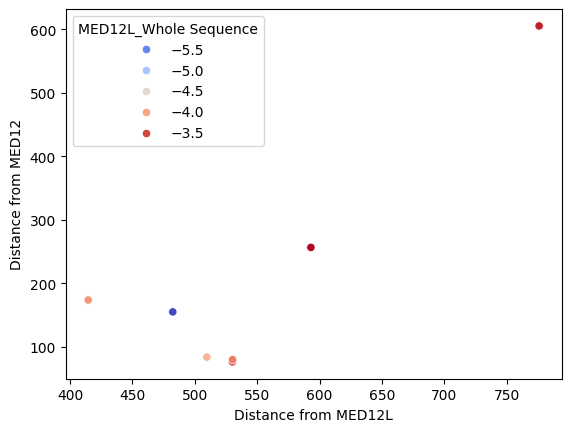

In [ ]:
#MED12L vs MED12 whole
test = finches_pivot_merge[["MED12L_Whole Sequence", "MED12_Whole Sequence", "Distance from MED12L", "Distance from MED12"]]
test = test[test["MED12L_Whole Sequence"] <= -3]
sns.scatterplot(test, x = "Distance from MED12L", y = "Distance from MED12", hue = "MED12L_Whole Sequence", palette="coolwarm")

<Axes: xlabel='Distance from MED12L', ylabel='FINCHES Epsilon'>

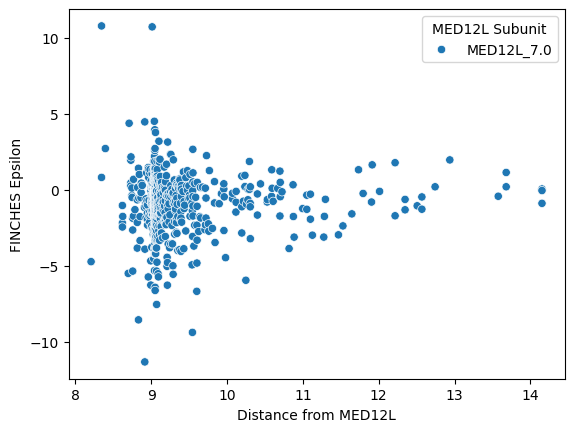

In [207]:
test = melted_MED12L[melted_MED12L["MED12L Subunit"]== "MED12L_7.0"].sort_values("Distance from MED12L").reset_index(drop=True)
test["Distance from MED12L"] = test["Distance from MED12L"].apply(np.log2)
sns.scatterplot(test, x = "Distance from MED12L", y = "FINCHES Epsilon", hue="MED12L Subunit")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='MED12L Subunit', ylabel='Distance from MED12L'>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


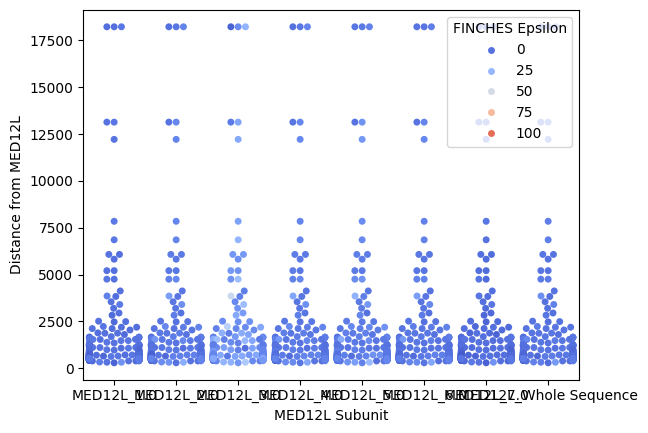

In [186]:
sns.swarmplot(melted_MED12L, x = "MED12L Subunit", y = "Distance from MED12L", hue = "FINCHES Epsilon", palette="coolwarm")

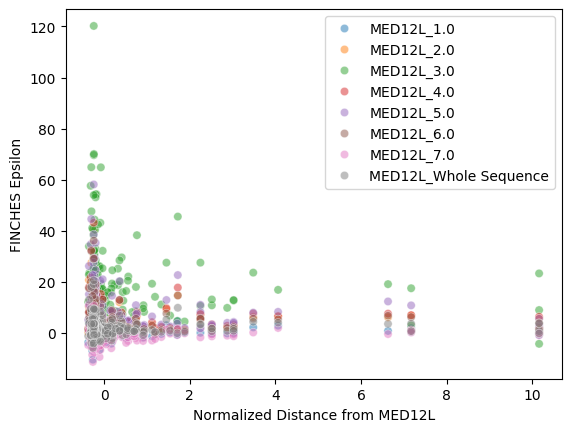

In [177]:
#get close MED12L
sns.scatterplot(melted_MED12L, x = "Normalized Distance from MED12L", y = "FINCHES Epsilon", hue = "MED12L Subunit", alpha=0.5)
plt.legend(bbox_to_anchor=(1,1))

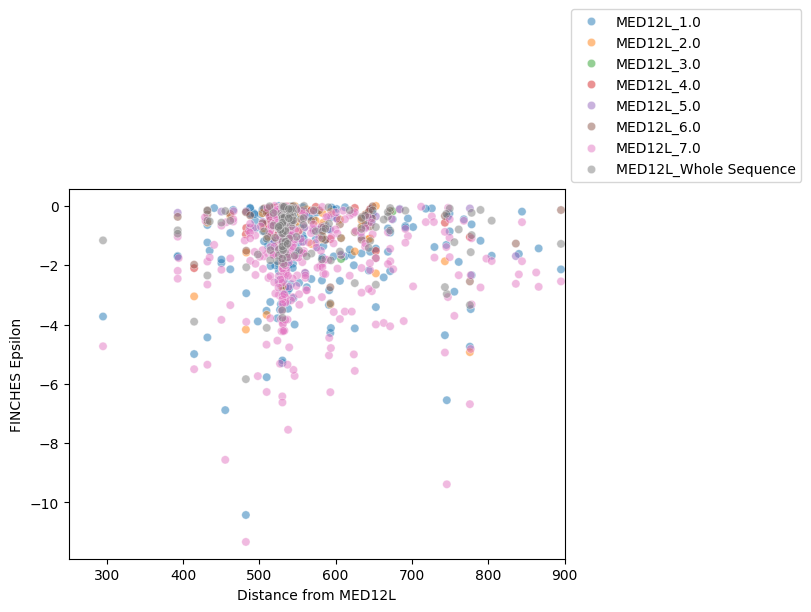

In [181]:
#get close MED12L
sns.scatterplot(melted_MED12L[melted_MED12L["FINCHES Epsilon"] <= 0], x = "Distance from MED12L", y = "FINCHES Epsilon", hue = "MED12L Subunit", alpha=0.5)
plt.xlim(250,900)
plt.legend(bbox_to_anchor=(1,1))

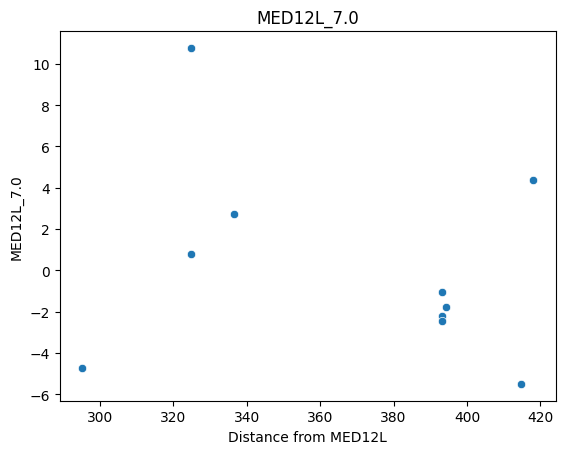

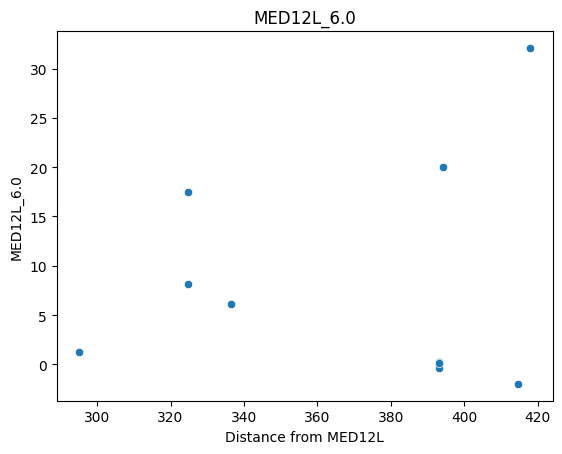

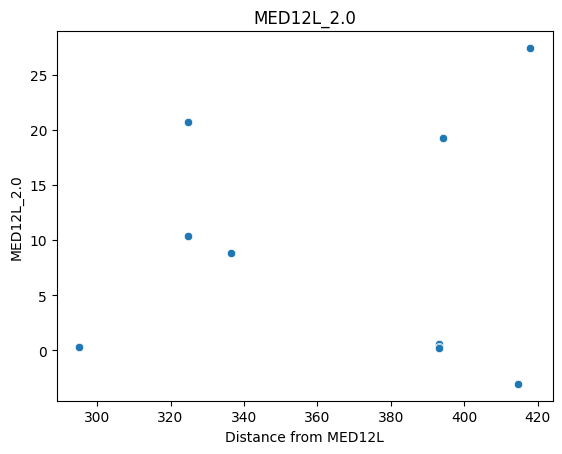

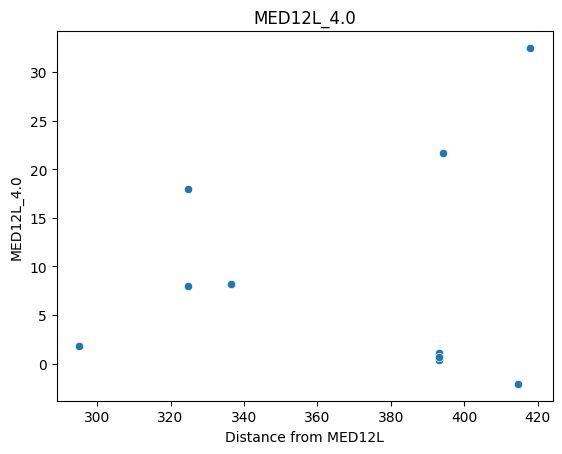

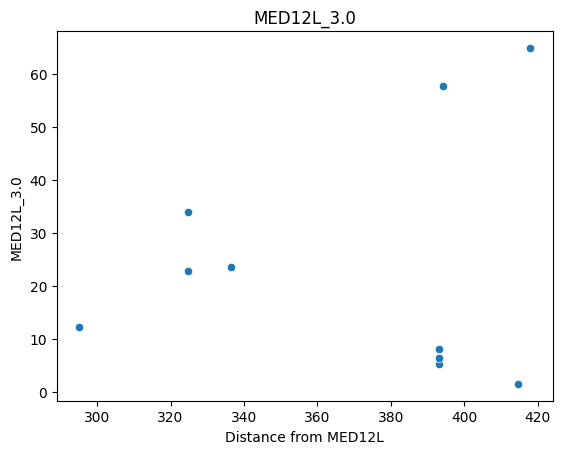

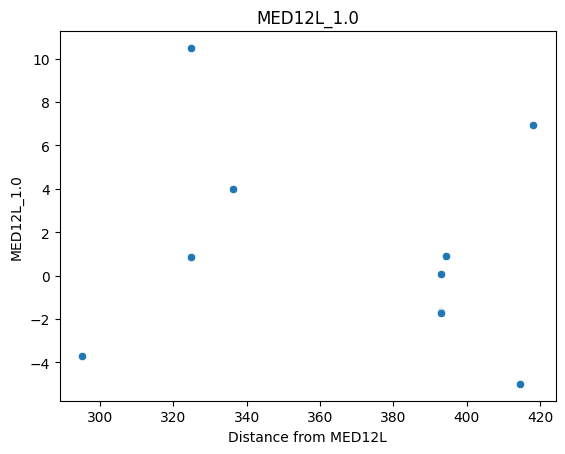

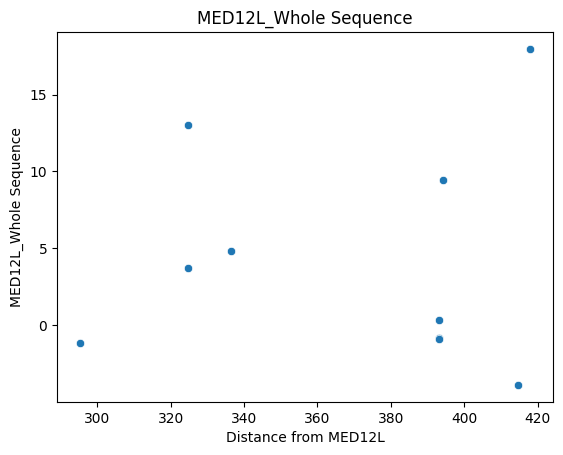

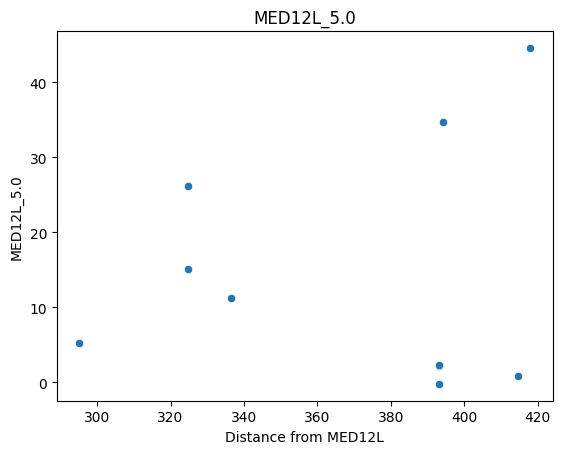

<Figure size 640x480 with 0 Axes>

In [167]:
for subunit in melted_MED12L["MED12L Subunit"].unique():
    df = finches_pivot_merge[["Distance from MED12L", subunit]].sort_values("Distance from MED12L").iloc[:10]
    sns.scatterplot(df, x = "Distance from MED12L", y = subunit)
    plt.title(subunit)
    plt.show()
    plt.clf()

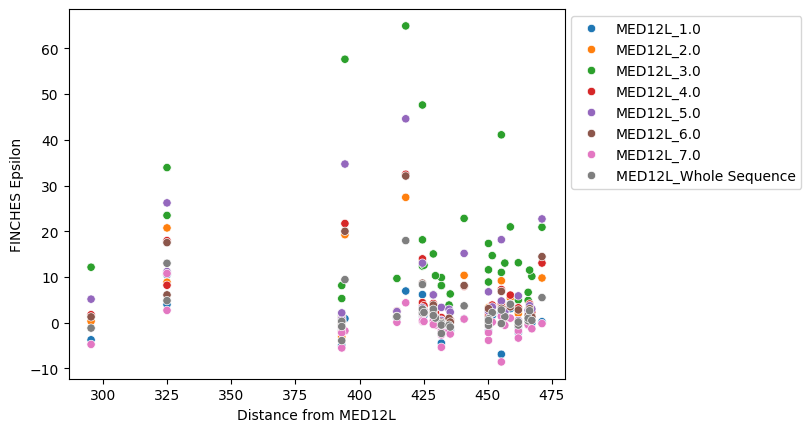

In [74]:
sns.scatterplot(MED12L_finches_pivot_melted[MED12L_finches_pivot_melted["Classification"] == "AD"], x = "Distance from MED12L", y = "FINCHES Epsilon", hue = "MED12L subunit")
plt.legend(bbox_to_anchor=(1,1))